# Tarea 1 Geometria Computacional: Red de drenaje

Miguel Gutierrez Vidal

Primero importamos las librerias que vamos a utilizar

In [1]:
import numpy as np
import scipy
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.interpolate import LinearNDInterpolator
from matplotlib import cm
%matplotlib inline

Creamos el TIN. Deje unos prints comentados por que me parecieron importantes si quiero volver a revisar este proyecto en un futuro

## TIN


In [65]:
class TIN:
    def __init__(self,location):
        if len(location)>3: # si los datos son mayores a 3 se puede crear TIN Correctamente
            self.location = location # lista(punto,elevacion)
            self.points = np.array([i[0] for i in location]) #lista puntos
            self.triangulation = Delaunay(vertices) # Triangulación de Delunay
            self.elevations = np.array([i[1] for i in location])  # Lista elevaciones
        else:  # si los datos no son mayores a 3 no se puede crear TIN Correctamente
            print("No se puede crear objeto, verifica que tiene mas de tres datos")
            
        
    def plot_triangulacion(self):
        """
        Grafica triangulacion Delunay de los puntos, es util para reconocer como se guarda el orden de los vertices
        y de las caras. Importante no confundirla con el plot de elevación.
        """ 
        
        vertices = self.points # Obtiene lista de puntos
        fig, ax = plt.subplots(figsize=(10,8)) # Ajustamos  tamaño del plot
        
        #Graficando posicion vertices con triangulos
        ax.triplot(vertices[:,0], vertices[:,1], self.triangulation.simplices) #Grafica lineas de triangulación
        ax.plot(vertices[:,0], vertices[:,1], 'o') #Grafica puntos de la triangulación
        
        # Añadimos texto a los puntos, que nos permiten determinar visualmente el orden de los puntos
        for j, p in enumerate(vertices):
            # j: index vertice, orden en el que esta en la lista
            ax.text(p[0]-0.03, p[1]+0.03, j, ha='right') # label the points
            
        # Añadimos texto a las caras de los triangulos
        for j, s in enumerate(self.triangulation.simplices):
            # Dejo los prints puesto son muy utiles para determinar si esta funcionando correctamente los algoritmos posteriores
            # print("simplices",s)
            # print("punto simplices \n", vertices[s])
            # print("---------------")
            p = vertices[s].mean(axis=0)
            ax.text(p[0], p[1], '#%d' % j, ha='center') # label triangles
        plt.title("Triangulacion Delunay")
        plt.show()
        return None
    
        
    def find_elevation(self,puntos):
        """
        Para el puntos suministrados encontramos su respectiva elevacion. Esta funcion solo deberia recibir
        puntos que se saben que se encuentran dentro de los puntos generados inicialmente. Especificamente trabajamos
        esta funcion con los vertices del triangulo.

        :param puntos: punto a mirar su elevacion [x,y]
        :return: elevaciones de los punto
        :location: lista (puntos,elevacion)
        """ 
        for i in self.location: #Iteramos en la lista de locacion
            if np.array_equal(i[0],puntos): # si encontramos un match, retorna la elevacion del punto
                return i[1]
        print("No se encontraron los puntos") # En caso contrario, no se encontraron puntos
        return None
        
    def find_elevations_points(self,points):
        """
        Para los puntos suministrados encontramos su respectiva elevacion. Esta funcion solo deberia recibir
        puntos que se saben que se encuentran dentro de los puntos generados inicialmente. Especificamente trabajamos
        esta funcion con los vertices del triangulo.

        :param points: lista de puntos a mirar su elevacion [x,y]
        :return: lista de elevaciones de los puntos
         location: lista (puntos,elevacion)
        """ 
        elevaciones = []
        for i in points: #iteramos por cada punto
                elevaciones.append(self.find_elevation(i)) #miramos si hay match y añade a la lista de elevaciones
        return elevaciones
        
    def plot_elevacion(self):
        """
        Grafica la triangulacion de Delunay con la elevacion de cada punto.
        """ 
        vertices = self.points # Obtiene lista de puntos
        fig, ax = plt.subplots(figsize=(10,8)) # Ajustamos  tamaño del plot
        
        #Graficando posicion vertices con triangulos
        ax.triplot(vertices[:,0], vertices[:,1], self.triangulation.simplices,'b-',alpha=0.5) #Grafica lineas de triangulación
        ax.plot(vertices[:,0], vertices[:,1], 'go') #Grafica puntos de la triangulación
        # Descomentar el siguiente print si se quiere verificar posicion vertices y elevacion
        #print("Los vertices del problema son \n",vertices)
        
        # plotea con texto
        for i in self.location: # itera sobre lista location (punto,elevacion)
            ax.annotate(round(i[1],2),i[0]) # Anotamos elevacion de cada vertice
            
        # enumera caras    
        for j, s in enumerate(self.triangulation.simplices):
            p = vertices[s].mean(axis=0) #escribir texto en mitad del cirulo
            ax.text(p[0], p[1], '#%d' % j, ha='center',color='grey') # label triangles        
        plt.title('Red de Elevacion')
        plt.show()
        return None
    
    
    def get_area_triangle(self,x,y):
        """
        Para los puntos suministrados encontramos su respectiva elevacion. Esta funcion solo deberia recibir
        puntos que se saben que se encuentran dentro de los puntos generados inicialmente. Especificamente trabajamos
        esta funcion con los vertices del triangulo.

        :param x: vector con tres puntos en el eje x
        :param y: vector con tres puntos en el eje y
        :return: Area del triangulo de los puntos
        """ 
        area=0.5*( (x[0]*(y[1]-y[2])) + (x[1]*(y[2]-y[0])) + (x[2]*(y[0]-y[1])) )
        return int(area)
    
    
    def value_elevation(self,point):
        """
        Dada la localizacion planar de un punto encuentra su elevacion correspondiente en la red triangulada.

        :param point: punto [x,y]
        :return point_elevation: Estimacion de la elevacion correspondiente
        """ 
        triangulacion = tin.triangulation # Triangulacion de Lunay
        
        # Encontrando cara de simplex que contiene punto
        cara = triangulacion.find_simplex(point) #-1 fuera de los triangulos
        if cara == -1:
            print("Ha elegido un punto fuera de la muestra, vuelvalo a intentar")
            return None
        print(f"El punto {point} se encuentra en la cara {cara}" )
        
        # Encuentra los vertices de triangulacion de la cara en el orden que los guarda la triangulacion de delunay
        # (en contra de las manecillas del reloj en 2D)
        puntos_cara = triangulacion.simplices[cara] #Encuentra los puntos de cara (orden de vertices lunay)
        puntos_cara = vertices[puntos_cara] # Este si son los puntos de la posicion en (x,y)
        elevaciones = self.find_elevations_points(puntos_cara) # Encuentra las elevaciones de los puntos de la cara
        func=LinearNDInterpolator(puntos_cara,elevaciones)# Interpolacion de los puntos de la cara con sus respectivas elevaciones
        point_elevation = round(func(point)[0],2) # retorna el valor de la elevación del punto redondeado a 2 decimales
        print("la elevacion del punto es",point_elevation)
        return point_elevation
    
    def drainage_basin(self,point):
        
        """
        Dada la localizacion planar de un punto encuentra su cuenca de drenaje. La cuenca de drenajes es un
        cuadrilatero, compuesto de dos triangulos que contienen la localizacion planar.

        :param point: punto [x,y]
        :return point_elevation: Estimacion de la elevacion correspondiente
        """ 
        
        triangulacion = tin.triangulation # Triangulacion de Delunay
        cara = triangulacion.find_simplex(point) #-1 fuera de los triangulos
        if cara == -1:
            print("Ha elegido un punto fuera de la muestra, vuelvalo a intentar")
            return
        
        # Obtiene las caras vecinos de la cara que miramos
        vecinos = triangulacion.neighbors[cara]
        print(f"El punto {point} se encuentra en la cara {cara}" )
        #print(" y sus vecinos son",vecinos)
        puntos_cara1 = triangulacion.simplices[cara] # Puntos de la cara en orden de la triangulacion
        puntos_cara1 = vertices[puntos_cara1] # Puntos de la cara posicion en (x,y)
        vecinos_area = []
        
        for vec in vecinos: # Recorre vecinos y obtiene area de los caras vecinas
            if vec !=-1: # -1 es por fuera de la triangulacion, luego no tomamos esa cara
                puntos_vec = triangulacion.simplices[vec] #puntos del area vecina
                puntos_vec = vertices[puntos_vec] # Puntos de la cara posicion en (x,y)
                vecinos_area.append(self.get_area_triangle(puntos_vec[:,0],puntos_vec[:,1])) # agrega area vecina triangulo
            else: vecinos_area.append(0) # es necesario agregar caso -1, para obtener indices correctamente
        
        
        max_area = max(vecinos_area) # obtenemos la area maxima de todas las caras vecinas
        index_max_area = vecinos_area.index(max_area) # encuentra la cara correspondiente al maximo area
        vecino_max = vecinos[index_max_area] # encuentra la cara vecina correspondiente al area maxima
        print(f"El vecino con mayor area es la cara {vecino_max} con un area de {max_area}")
        puntos_cara2 = triangulacion.simplices[vecino_max] # Puntos de la cara en orden de la triangulacion
        puntos_cara2 = vertices[puntos_cara2] # Puntos de la posicion en (x,y)
        puntos_drainage = [puntos_cara1 ,puntos_cara2] # Puntos acotan drenajes = puntos cara + puntos cara vecina
        print("Los puntos que acotan el cuadrilateron son",puntos_drainage )
        return puntos_drainage
    
    def angle(self,a,b,c):
        """
        Para tres puntos a,b,c, encontramos los respectivos angulos de su triangulacion.

        :param a: punto 1 [x,y]
        :param b: punto 2 [x,y]
        :param c: punto 3 [x,y]
        :return angles: lista ordenada de los angulos de la triangulacion
        """ 
        angles = []
        ba = a - b # a - base
        bc = c - b # a - base
        #formula vectorial obtener angulo entre vectores ba y bc
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc)) 
        angle = np.arccos(cosine_angle)
        angles.append(round(np.degrees(angle),2))
        
        #Cambiamos el vector ahora como punto base a
        ba = b - a
        bc = c - a
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        angles.append(round(np.degrees(angle),2))
        
        #Cambiamos el vector ahora como punto base c
        ba = a - c
        bc = b - c
        cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
        angle = np.arccos(cosine_angle)
        angles.append(round(np.degrees(angle),2)) 
        
        return sorted(angles) # Angulos redondeados con dos decimales
    
    def quality_triangulation(self,point):
        """
        Dada la localizacion planar de un punto reporta la calidad de la triangulacion alredero de el punto.
        La calidad del triangulo puede ser medida al reportar el el maximo y minimo angulo del triangulo.

        :param a: punto [x,y]
        :return angles: lista ordenada de los angulos de la triangulacion
        """ 
        triangulacion = tin.triangulation # Triangulacion de Delunay
        # Encontrando cara de simplex que contiene punto
        cara = triangulacion.find_simplex(point) #-1 fuera de los triangulos
        print(f"El punto {point} se encuentra en la cara {cara}" )
        # Encuentra los vertices de triangulacion de la cara en el orden que los guarda la triangulacion de delunay
        # (en contra de las manecillas del reloj en 2D)
        puntos_cara = triangulacion.simplices[cara]
        puntos_cara = vertices[puntos_cara] # Encontramos los puntos de la posicion en [x,y]
        angles = self.angle(puntos_cara[0],puntos_cara[1],puntos_cara[2])# Aplicamos funciones para obtener angulos triangulo
        print("Los angulos en orden son",angles)
        return angles
    
    def plot_3d(self):
        """
        Dado los puntos de muestreo del terreno grafica el perfil de elvacion como una grafica tridimensional.
        """ 
        # plot surface encontrando el conjunto de triangulos formado por los puntas adyacentes
        vertices = self.points
        elevations = self.elevations
        x = vertices[:,0] #Obtenemos coordenas x de los puntos
        y = vertices[:,1] #Obtenemos coordenas y de los puntos
        z = elevations # La coordenada y son las elevaciones
        
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(10,8)) # Generamos grafico 3D
        surf = ax.plot_trisurf(x, y, z,cmap='viridis', edgecolor='none'); # Graficamos superficie con triangulacion 3D
        ax.set_title("Grafica 3D terreno")
        cbar = fig.colorbar(surf, shrink=0.5, aspect=5) # Grafica de barra de color de la elevacion
        cbar.ax.set_title('Elevacion')
        
        # Grafica la triangulacion de Delunay en la proyeccion 2D
        ax.triplot(vertices[:,0], vertices[:,1], self.triangulation.simplices,'b-',alpha=0.5,zs=min(np.min(z),0)
                   ,label='Triangulacion')
        ax.plot(vertices[:,0], vertices[:,1],'go',zs=min(np.min(z),0), zdir='z',label='vertices')
        ax.legend()
        
        plt.show()
        return None
        
    def find_vertex_neighboorhoods(self,k_vertex):
        """
        Dado el vertice k en orden de la triangulacion de lunay, encontramos sus vertices vecinos. Esta funcion es util para
        encontrar el camino rio abajo. La funcion es recomendada por scipy.
        
        :param k_vertices: vertices en la triangulacion delunay
        :return vecinos: vertices vecinos en el orden de la triangulacion de delunay
        """ 
        indptr, indices = tin.triangulation.vertex_neighbor_vertices
        return indices[indptr[k_vertex]:indptr[k_vertex+1]]
    
    def water_path_down(self,point):
        """
        Dado la localizacion planar de un punto iniial, encontrar el camino rio abajo del terreno. Esto es una serie
        de puntos que muestran para dado un punto el orden de descendencia del agua. Esta funcion imprime el camino
        de rio abajo.
        
        :param point: punto [x,y]
        Retorna dos listas
        :return points_water_path_down: vertices del camino rio abajo
        :return points_levels_water_path_down: elevaciones de los vertices del camino rio abajo

        """ 
        vertices = self.points
        triangulacion = tin.triangulation
        elevations = self.elevations
        points_water_path_down = []
        levels_water_path_down = []
        point_elevation = self.value_elevation(point)
        points_water_path_down.append(point)
        levels_water_path_down.append(point_elevation)
        
        ## PRIMERO NECESITA ENCONTRAR EL VERTICE DE ELEVACION MINIMO DEL TRIANGULO DADO EL PUNTO PASADO ##
        # Encontrando cara de simplex que contiene punto
        cara = triangulacion.find_simplex(point) #-1 fuera de los triangulos
        if cara == -1:
            print("Ha elegido un punto fuera de la muestra, vuelvalo a intentar")
            return None
        
        # Encontrando los puntos de la frontera de la cara en el orden que los guarda la triangulacion de lunay
        # (en contra de las manecillas del reloj que fronterizan la cara)
        puntos_cara = triangulacion.simplices[cara]
        puntos_cara = vertices[puntos_cara] # Encontramos los puntos de la posicion en [x,y]
        elevaciones = self.find_elevations_points(puntos_cara)         # Elevaciones de los puntos de la cara
        # print("Elevaciones",elevaciones)
        min_elevacion = min(elevaciones)  # obtenemos la minima elevacion de los tres vertices
        print("Elevacion minima del triangulo es ",min_elevacion)
        # encontras el vertice correspondiente al de minima altura
        index_min_elevacion = np.where(elevaciones==min_elevacion)
        index_min_elevacion = index_min_elevacion[0][0]
        
        # Definimos el nuevo punto como el vertice que en contramos con su respectiva elevacion
        point = puntos_cara[index_min_elevacion]
        point_elevation = elevaciones[index_min_elevacion]
        
        points_water_path_down.append(point)
        levels_water_path_down.append(point_elevation)
        print(f"El nuevo punto es {point} con elevacion {point_elevation}")
        # index lista de puntos
        ## Encontrando numero vertice en triangulacion
        index_vertex = np.where((vertices[:,0] == point[0]) & (vertices[:,1]==point[1]))[0]
        index_vertex = index_vertex[0] # el indice de vertice es el vertice en el orden de la triangulacion de delunay
        print("EL vertice del punto es",index_vertex)
        
        # AHORA SI  YA SABEMOS QUE SOLO VAMOS A TRABAJAR CON VERTICES DEL TRIANGULO
        # COMENZAMOS A ITERAR POR LOS VERTICES DEL TRIANGULO Y A COMPARAR ELEVACIONES
        
        while(True): #Hasta que encuentre minimo elevacion comparado con sus vecinos
            neighborhood = self.find_vertex_neighboorhoods(index_vertex) # Encuentra vertices vecinos del vertice pasado
            #print("Neighborhood, ",neighborhood)
            elevations_neigh = []
            for i in neighborhood: # por cada vecino
                elevation_neigh = elevations[i] # encuentra su elevacion
                elevations_neigh.append(elevation_neigh) # la añadimos a una lista para proxima comparaion
            min_elevacion_neigh = min(elevations_neigh) # Encontramos la minima elevacion de los vecino
            # Encontramos posicion de la minima elevacion de los vecinoss
            index_min_elevacion_neigh = elevations_neigh.index(min_elevacion_neigh) 
            neigh = neighborhood[index_min_elevacion_neigh] # Obtenemos el numero de vecino en el orden de Delunay
            if point_elevation > min_elevacion_neigh: # Si el vecino con menor elevacion es menor al del vertice, cambia punto
                point = vertices[neigh] #el nuevo punto es el vecino
                point_elevation = elevations[neigh] #elevacion del nuevo punto es el vecino de minima altura
                print(f"El nuevo punto es {point} con elevacion {point_elevation}")
                points_water_path_down.append(point) #añadimos a lista de puntos
                levels_water_path_down.append(point_elevation) #añadimos a lista de elevaciones
                index_vertex = neigh
            else: # Si ninguno vecino tiene altura menor que el punto, salgase y termine
                break
        return points_water_path_down, levels_water_path_down

Recuerde que si quiere ver las grafica 3D y rotarla, puede utilizar el codigo %matplotlib notebook. En caso contrario puede utilizar %matplotlib inline.Deje por defecto %matplotlib inline

# Test Suite

Generamos los datos aleatorios con sus respectiva altura, gen_numpoints, es el numero de datos que usted quiere generar. Asi mismo el tope maximo de altura. Modifiquelo a su gusto En general genere pocos datos para verificar visualmente que mis funciones funcionaban correctamente.

In [66]:
gen_numpoints = 10
tope_max_altura = 25
vertices = np.random.randint(tope_max_altura, size=(gen_numpoints,2))
elevation = np.random.randint(tope_max_altura,size=gen_numpoints)

In [67]:
print("Los Vertices generados son: ",vertices)
print("Sus respectivas elevaciones son: ",elevation)

Los Vertices generados son:  [[ 4 19]
 [ 4  4]
 [ 6 13]
 [21  2]
 [ 8 10]
 [22 24]
 [ 6  5]
 [18 11]
 [ 0 12]
 [ 0  1]]
Sus respectivas elevaciones son:  [20 21  9 23  6 22 13  7 24 20]


Luego me parecio útil hacer un tipo de lista / diccionario de {vertice:elevación}

In [68]:
location = list(zip(vertices,elevation))
print("Locacion:", location)

Locacion: [(array([ 4, 19]), 20), (array([4, 4]), 21), (array([ 6, 13]), 9), (array([21,  2]), 23), (array([ 8, 10]), 6), (array([22, 24]), 22), (array([6, 5]), 13), (array([18, 11]), 7), (array([ 0, 12]), 24), (array([0, 1]), 20)]


In [69]:
%matplotlib inline
#%matplotlib notebook
tin = TIN(location) # Genera TIN con los puntos datos generados

Primero verificamos que este guardando las propiedades correctamente

In [70]:
vertices = tin.points
print("Los vertices del TIN son",vertices)
elevaciones = tin.elevations
print("Las elevaciones del TIN son",elevaciones)

Los vertices del TIN son [[ 4 19]
 [ 4  4]
 [ 6 13]
 [21  2]
 [ 8 10]
 [22 24]
 [ 6  5]
 [18 11]
 [ 0 12]
 [ 0  1]]
Las elevaciones del TIN son [20 21  9 23  6 22 13  7 24 20]


## Graficas

Me parecen utiles las siguientes graficas para verificar que el algoritmo este realizando correctamente cada funcion. La primera grafica se encarga de mostrar la triangulacion de delunay con el orden en que fueron triangulados los vertices. Esto fue util ya que la triangulacion de lunay trabajacon este orden de vertices.

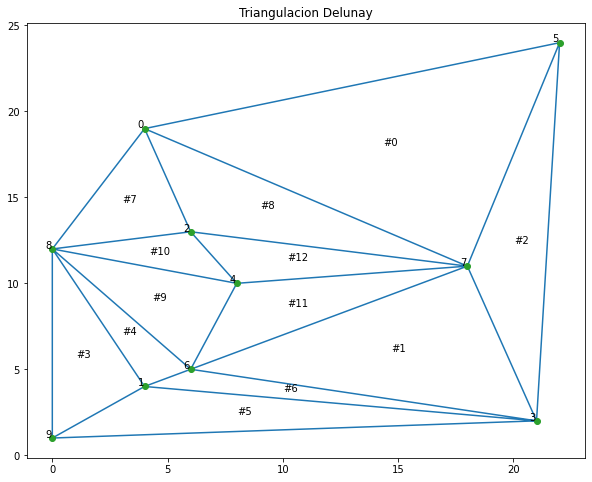

In [71]:
tin.plot_triangulacion()

La segunda grafica muestra la grafica de los untos de muestra con los vertices y sus respectivas elevaciones, donde el texto junto a los vertices corresponde a su elevacion.

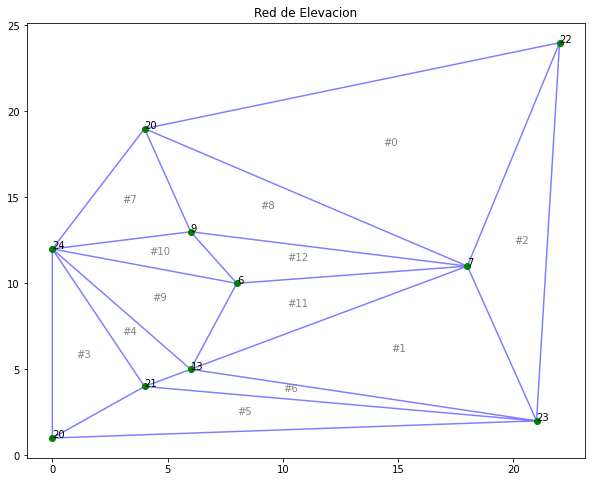

In [72]:
tin.plot_elevacion()

## Puntos revisar tarea

Elija el punto del cual quiera obtener informacion

In [73]:
punto = [15,8]

## Punto 1

In [74]:
# Test Evaluation
tin.value_elevation(punto)

El punto [15, 8] se encuentra en la cara 1
la elevacion del punto es 11.0


11.0

## Punto 2

In [75]:
tin.drainage_basin(punto)

El punto [15, 8] se encuentra en la cara 1
El vecino con mayor area es la cara 2 con un area de 37
Los puntos que acotan el cuadrilateron son [array([[ 6,  5],
       [21,  2],
       [18, 11]]), array([[18, 11],
       [21,  2],
       [22, 24]])]


[array([[ 6,  5],
        [21,  2],
        [18, 11]]),
 array([[18, 11],
        [21,  2],
        [22, 24]])]

## Punto 3

In [76]:
tin.quality_triangulation([16,10])

El punto [16, 10] se encuentra en la cara 11
Los angulos en orden son [20.85, 41.63, 117.51]


[20.85, 41.63, 117.51]

## Punto 4

In [77]:
lista_puntos, lista_niveles = tin.water_path_down(punto)
print(" Los puntos recorridos fueron en orden",lista_puntos)
print(" Las elevaciones recorridas fueron en orden",lista_niveles)

El punto [15, 8] se encuentra en la cara 1
la elevacion del punto es 11.0
Elevacion minima del triangulo es  7
El nuevo punto es [18 11] con elevacion 7
EL vertice del punto es 7
El nuevo punto es [ 8 10] con elevacion 6
 Los puntos recorridos fueron en orden [[15, 8], array([18, 11]), array([ 8, 10])]
 Las elevaciones recorridas fueron en orden [11.0, 7, 6]


## Punto 5

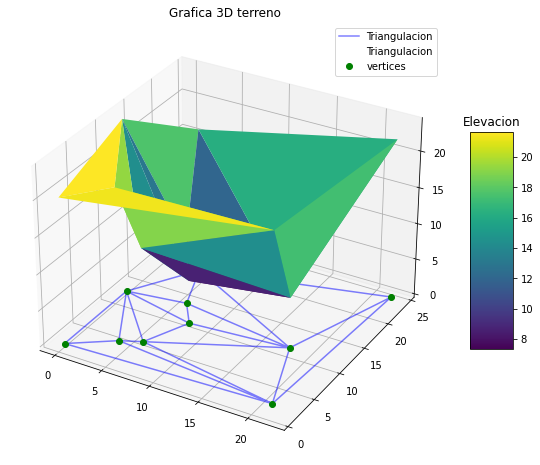

In [78]:
tin.plot_3d()

## Generando datos con exponencial

Aca como punto extra genero los datos como fueron presentado en la clase

In [79]:
gen_numpoints = 10
vertices = np.random.randint(tope_max_altura, size=(gen_numpoints,2))
X = vertices[:,0]
Y = vertices[:,1]
R = np.sqrt(X**2+Y**2)
elevation = np.exp(-R/3.0)*np.abs(np.cos(X+Y))+np.cos(X-Y)

In [80]:
location = list(zip(vertices,elevation))
tin = TIN(location)

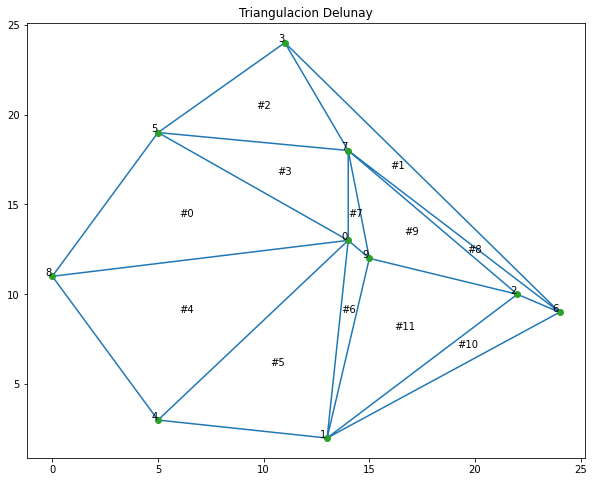

In [81]:
tin.plot_triangulacion()

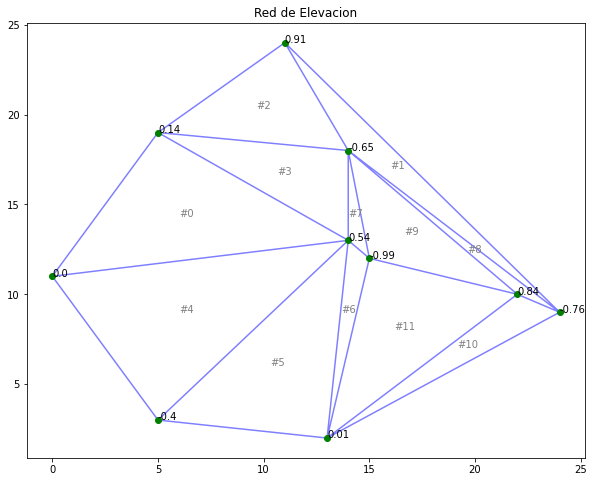

In [82]:
tin.plot_elevacion()

In [83]:
punto = [10,12]

In [84]:
# Test Evaluation
tin.value_elevation(punto)

El punto [10, 12] se encuentra en la cara 4
la elevacion del punto es 0.36


0.36

In [85]:
tin.drainage_basin(punto)

El punto [10, 12] se encuentra en la cara 4
El vecino con mayor area es la cara 0 con un area de 51
Los puntos que acotan el cuadrilateron son [array([[ 5,  3],
       [14, 13],
       [ 0, 11]]), array([[14, 13],
       [ 5, 19],
       [ 0, 11]])]


[array([[ 5,  3],
        [14, 13],
        [ 0, 11]]),
 array([[14, 13],
        [ 5, 19],
        [ 0, 11]])]

In [86]:
tin.quality_triangulation([16,10])

El punto [16, 10] se encuentra en la cara 11
Los angulos en orden son [37.06, 57.58, 85.36]


[37.06, 57.58, 85.36]

Parece que como trabajo con elevaciones pequeñas, cometer errores de calculos numericos y hay overflow y vuelve negativos
numeros

In [87]:
# Parece que como trabajo con elevaciones pequeñas, cometer errores de calculos numericos y hay overflow y vuelve negativos
# numeros
lista_puntos, lista_niveles = tin.water_path_down(punto)
print(" Los puntos recorridos fueron en orden",lista_puntos)
print(" Las elevaciones recorridas fueron en orden",lista_niveles)

El punto [10, 12] se encuentra en la cara 4
la elevacion del punto es 0.36
Elevacion minima del triangulo es  -0.39531409863688816
El nuevo punto es [5 3] con elevacion -0.39531409863688816
EL vertice del punto es 4
 Los puntos recorridos fueron en orden [[10, 12], array([5, 3])]
 Las elevaciones recorridas fueron en orden [0.36, -0.39531409863688816]


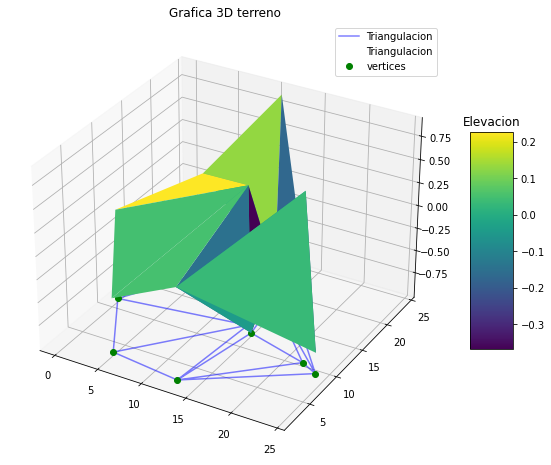

In [88]:
tin.plot_3d()

## Referencias funciones Utilizadas

* Area Triangulo 3 puntos : https://stackoverflow.com/questions/59597399/area-of-triangle-using-3-sets-of-coordinates
* Calculos Angulos 3 puntos : https://manivannan-ai.medium.com/find-the-angle-between-three-points-from-2d-using-python-348c513e2cd